In [3]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# select dataframe & set ELEXM_SETTLEMENT_DATE as datetime column
df = pd.read_parquet('Datasets/espeniWithNegPSvalues.ztsd.parquet')
df['ELEXM_SETTLEMENT_DATE'] = pd.to_datetime(df['ELEXM_SETTLEMENT_DATE'], utc=True)

# create new column for YEAR & set YEAR as indexed column (this was done since the data kept shifting forwards a year when being plotted with ELEXM_utc as the indexed column)
df['YEAR'] = df['ELEXM_SETTLEMENT_DATE'].dt.year
df.set_index('YEAR', inplace=True)

# take absolute values for POWER_ELEXM_PS_MW column (new coluumn produced)
df['POWER_ELEXM_PS_MW_abs'] = abs(df['POWER_ELEXM_PS_MW'])

# combine wind & embedded wind generation columns
df['POWER_ELEXM_WIND_MW_TOTAL'] = df['POWER_ELEXM_WIND_MW'] + df['POWER_NGEM_EMBEDDED_WIND_GENERATION_MW']

# remove unecessary columns (this was done as the next line of code applies a delta function to all columns, which wouldn't have made sense to do to these)
df.drop(['ELEXM_utc', 'ELEXM_SETTLEMENT_DATE', 'ELEXM_SETTLEMENT_PERIOD', 'ELEXM_localtime', 'ELEXM_ROWFLAG', 'NGEM_ROWFLAG', 'POWER_ESPENI_MW', 'POWER_ELEXM_PS_MW', 'POWER_ELEXM_WIND_MW', 'POWER_NGEM_EMBEDDED_WIND_GENERATION_MW'], axis=1, inplace=True)

# apply delta function to all columns
df_delta = df.apply(lambda x : (abs(x.diff().shift(-1)))/1000000)

# aggregate data by YEAR (NOTE, NEW COLUMN HEADINGS SHOULD BE IN TW BUT REMAINED IN MW, NEED TO LOOK AT CHANGING THIS)
df_delta_sum = df_delta.groupby(['YEAR']).sum()

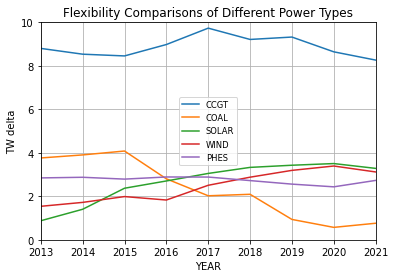

In [4]:
# plot major delta values from 2013 to 2021
plt.plot(df_delta_sum['POWER_ELEXM_CCGT_MW'].iloc[5:14])
plt.plot(df_delta_sum['POWER_ELEXM_COAL_MW'].iloc[5:14])
plt.plot(df_delta_sum['POWER_NGEM_EMBEDDED_SOLAR_GENERATION_MW'].iloc[5:14])
plt.plot(df_delta_sum['POWER_ELEXM_WIND_MW_TOTAL'].iloc[5:14])
plt.plot(df_delta_sum['POWER_ELEXM_PS_MW_abs'].iloc[5:14])
plt.legend(['CCGT', 'COAL', 'SOLAR', 'WIND', 'PHES'], fontsize='small', loc='center')
plt.title('Flexibility Comparisons of Different Power Types')
plt.grid()
plt.ylim([0, 10])
plt.xlabel('YEAR')
plt.ylabel('TW delta')
plt.margins(x=0)